In [4]:
from functools import reduce
import pandas as pd
import numpy as np
import itertools as itr
import math
import siuba
from siuba import _, mutate
import plotnine
from plotnine import aes, ggplot, geom_point
from siuba.data import cars, cars_sql

In [4]:
seed = 1335
n = 50
rn_g = np.random.default_rng(seed)
x = rn_g.normal(loc=0.0, scale =1, size =n)
y = x + rn_g.normal(loc=0.0,scale = 1, size =n)

In [5]:
df = pd.DataFrame({'x':x, 'y':y})
df=(
df >>
    mutate(z= _.x + _.y) >>
    mutate(up = _.x > _.y)
)
df.head()

,x,y,z,up
0,-0.863825,-2.278823,-3.142648,True
1,-0.042430,-0.576620,-0.619050,True
2,-0.298208,-0.657312,-0.955519,True
3,0.577730,0.402440,0.980170,True
4,0.493105,-0.340730,0.152376,True


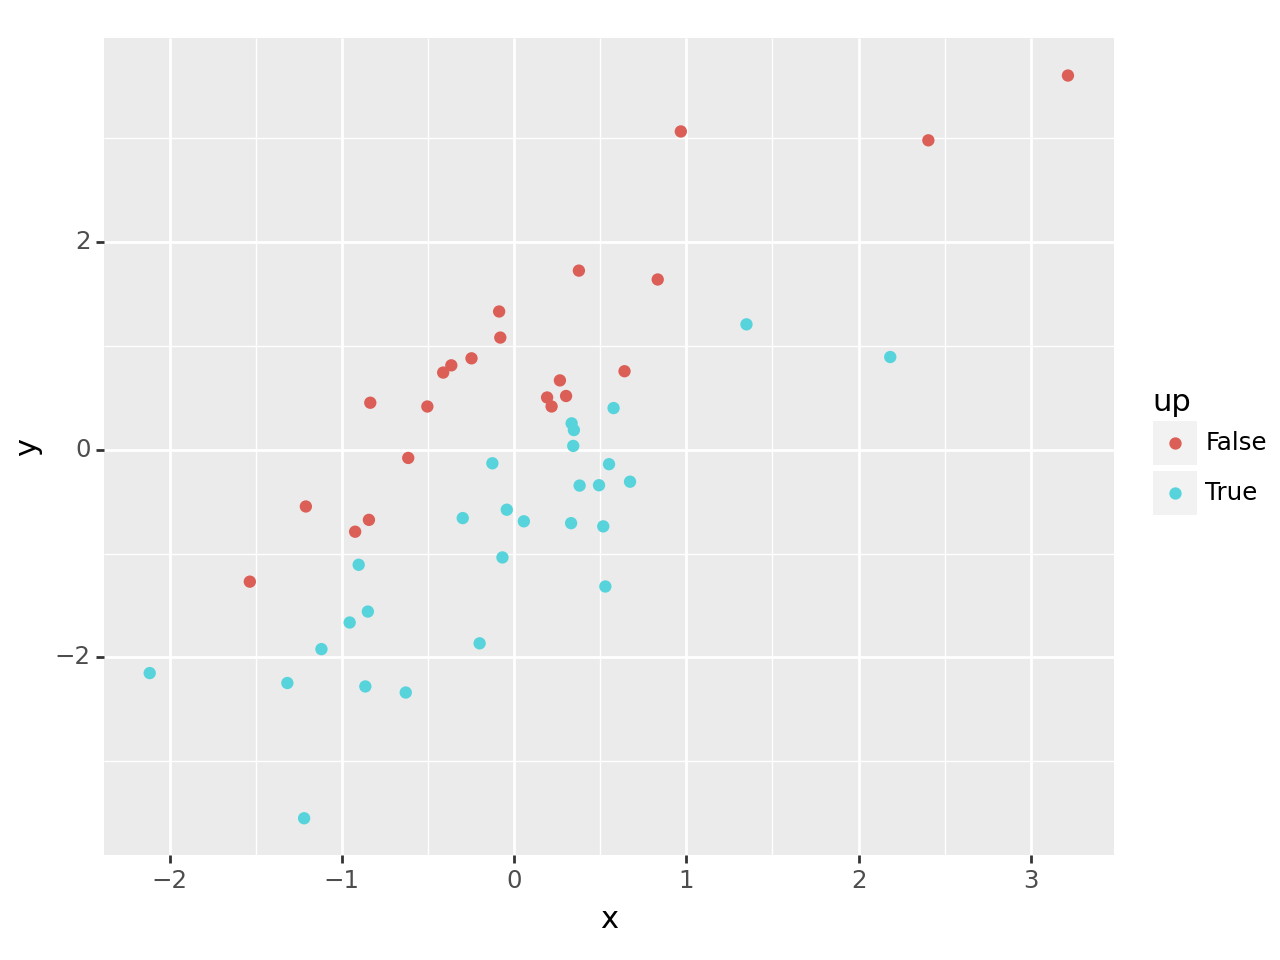

<Figure Size: (640 x 480)>

In [4]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() 
)

In [5]:
cars.head()

,cyl,mpg,hp
0,6,21.0,110
1,6,21.0,110
2,4,22.8,93
3,6,21.4,110
4,8,18.7,175


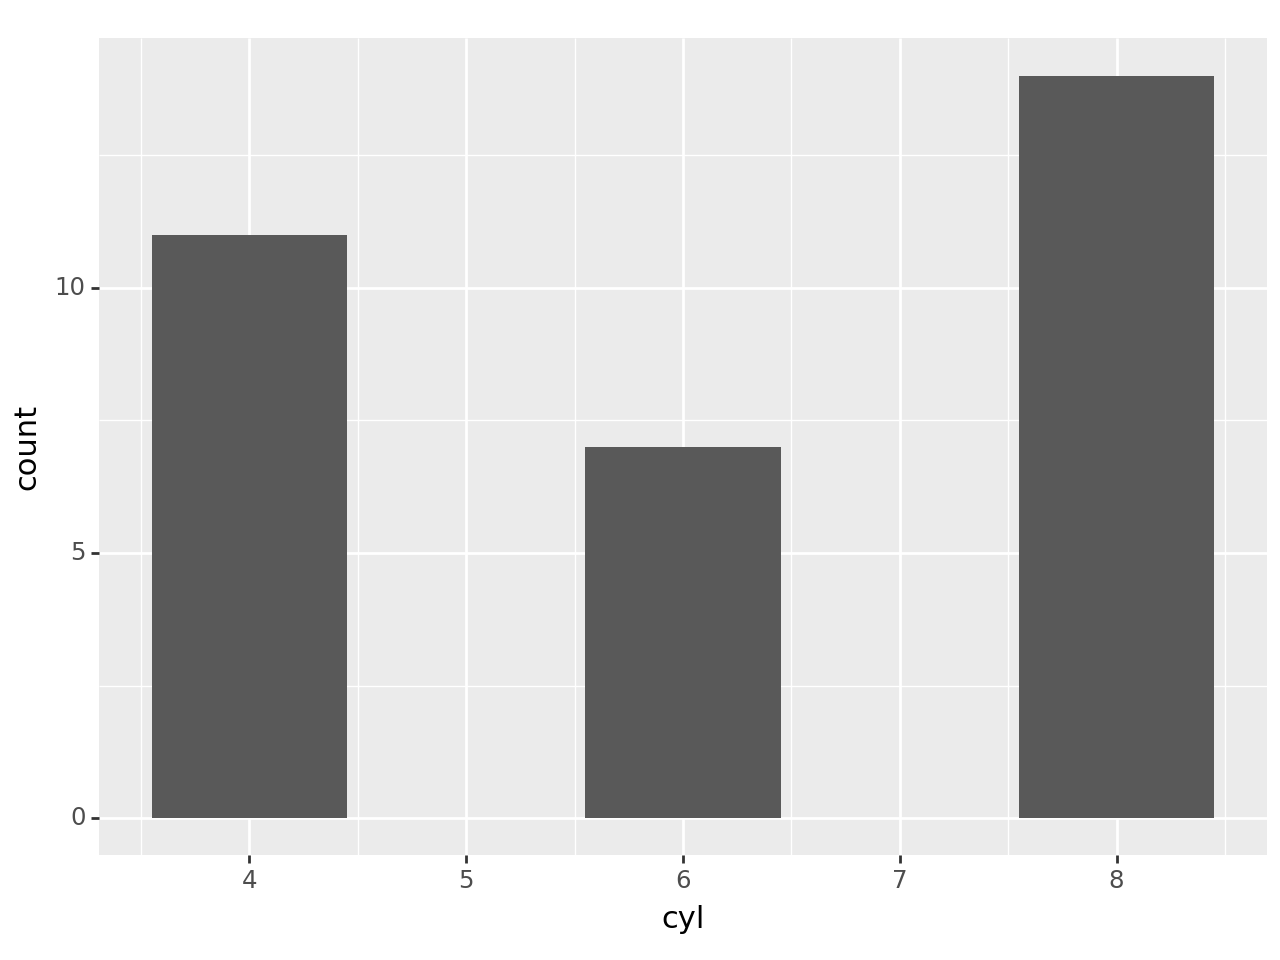

<Figure Size: (640 x 480)>

In [6]:
(
cars >>
    plotnine.ggplot(aes(x ='cyl',color='cyl')) +
    plotnine.geom_bar()
)

In [1]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() +
    plotnine.geom_abline(aes(intercept=0, slope=1.2),color='green',size=2)
)

NameError: name 'df' is not defined

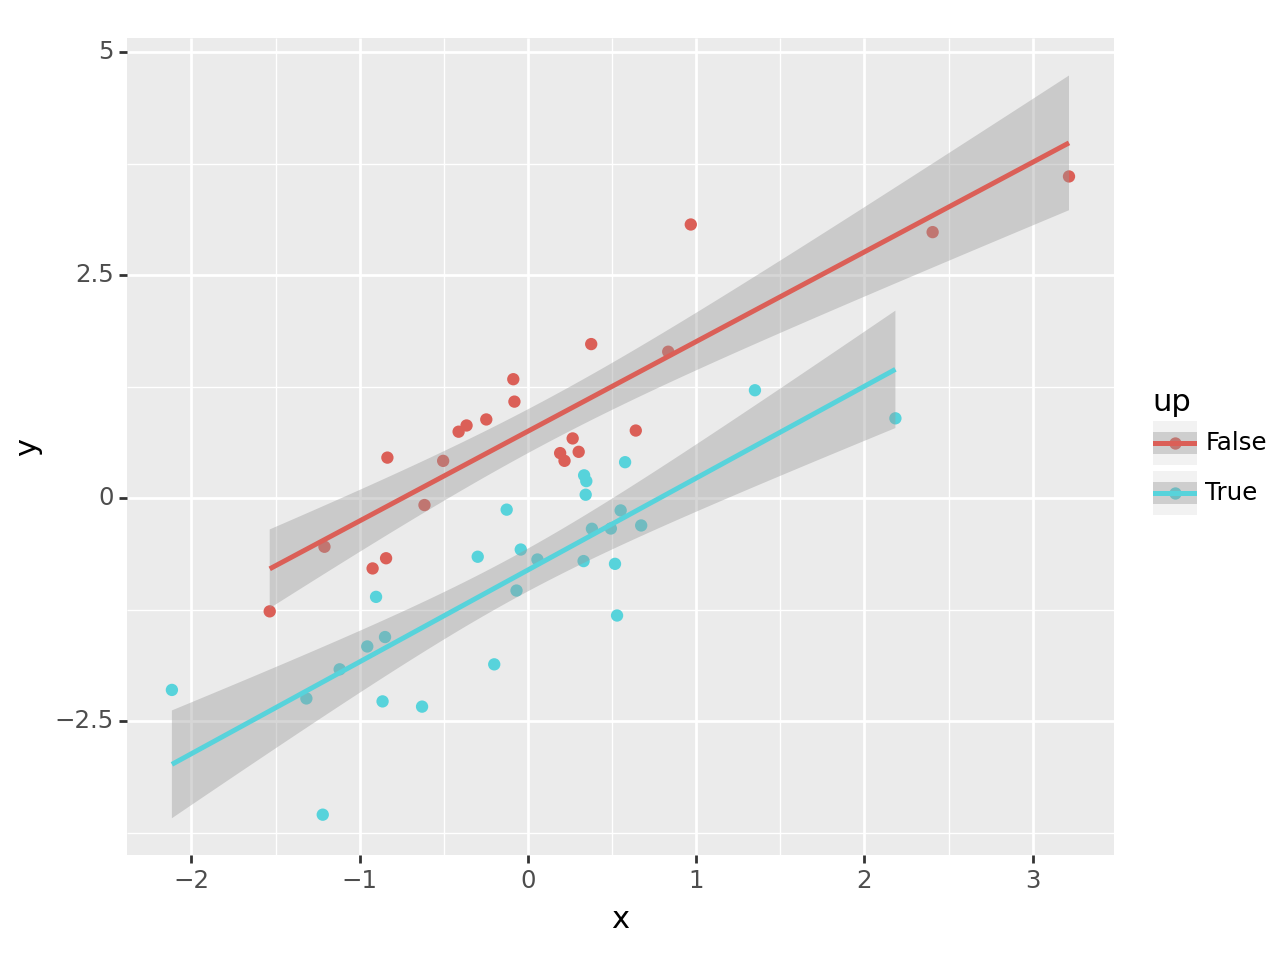

<Figure Size: (640 x 480)>

In [8]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() +
    # plotnine.geom_abline(aes(intercept=0, slope=1.2),color='green',size=2)
    plotnine.geom_smooth(method='lm')
)

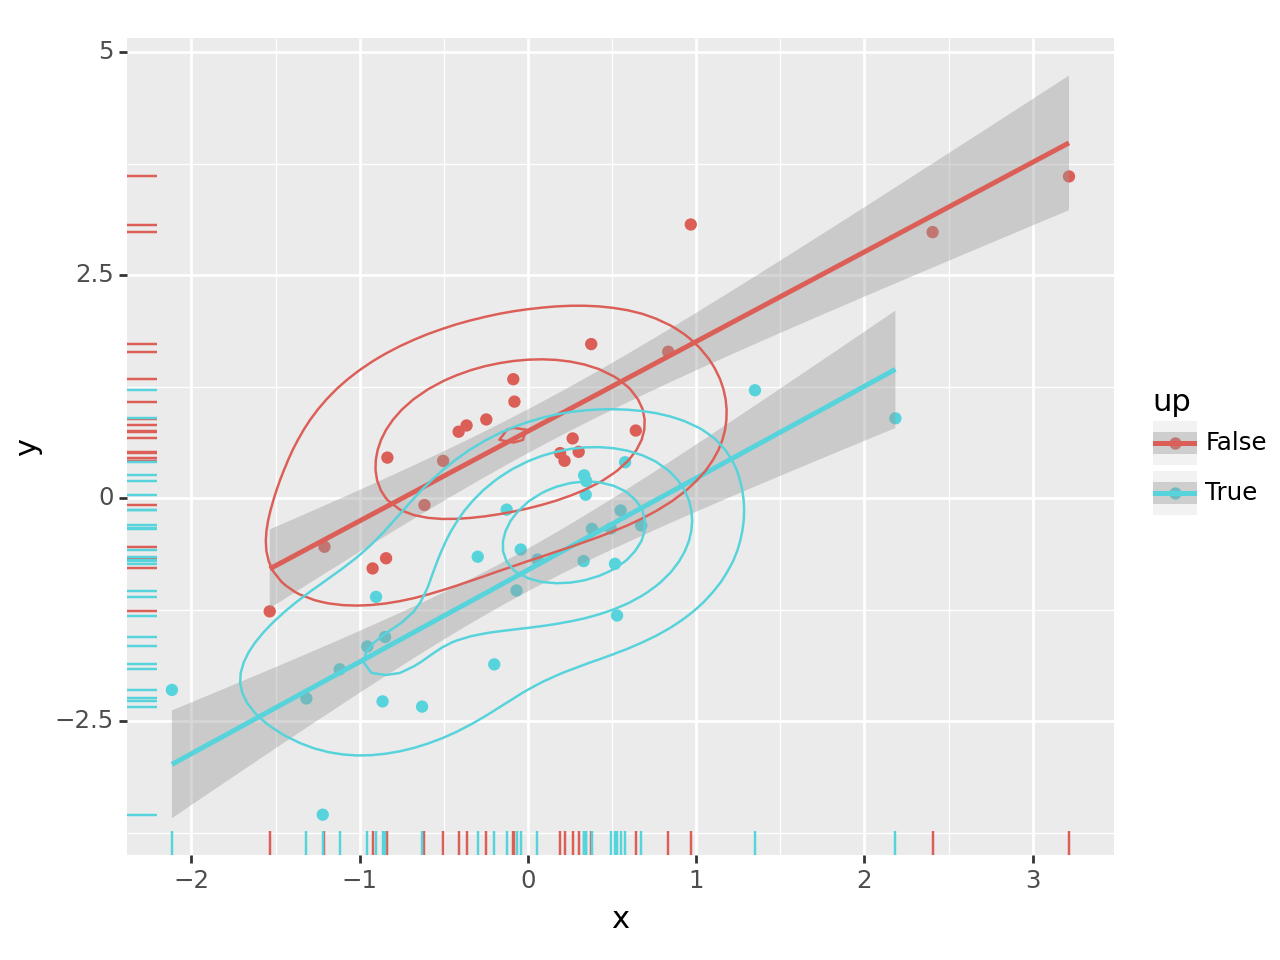

<Figure Size: (640 x 480)>

In [9]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() +
    # plotnine.geom_abline(aes(intercept=0, slope=1.2),color='green',size=2)
    plotnine.geom_smooth(method='lm')+
    plotnine.geom_rug() +
    plotnine.geom_density_2d()
)

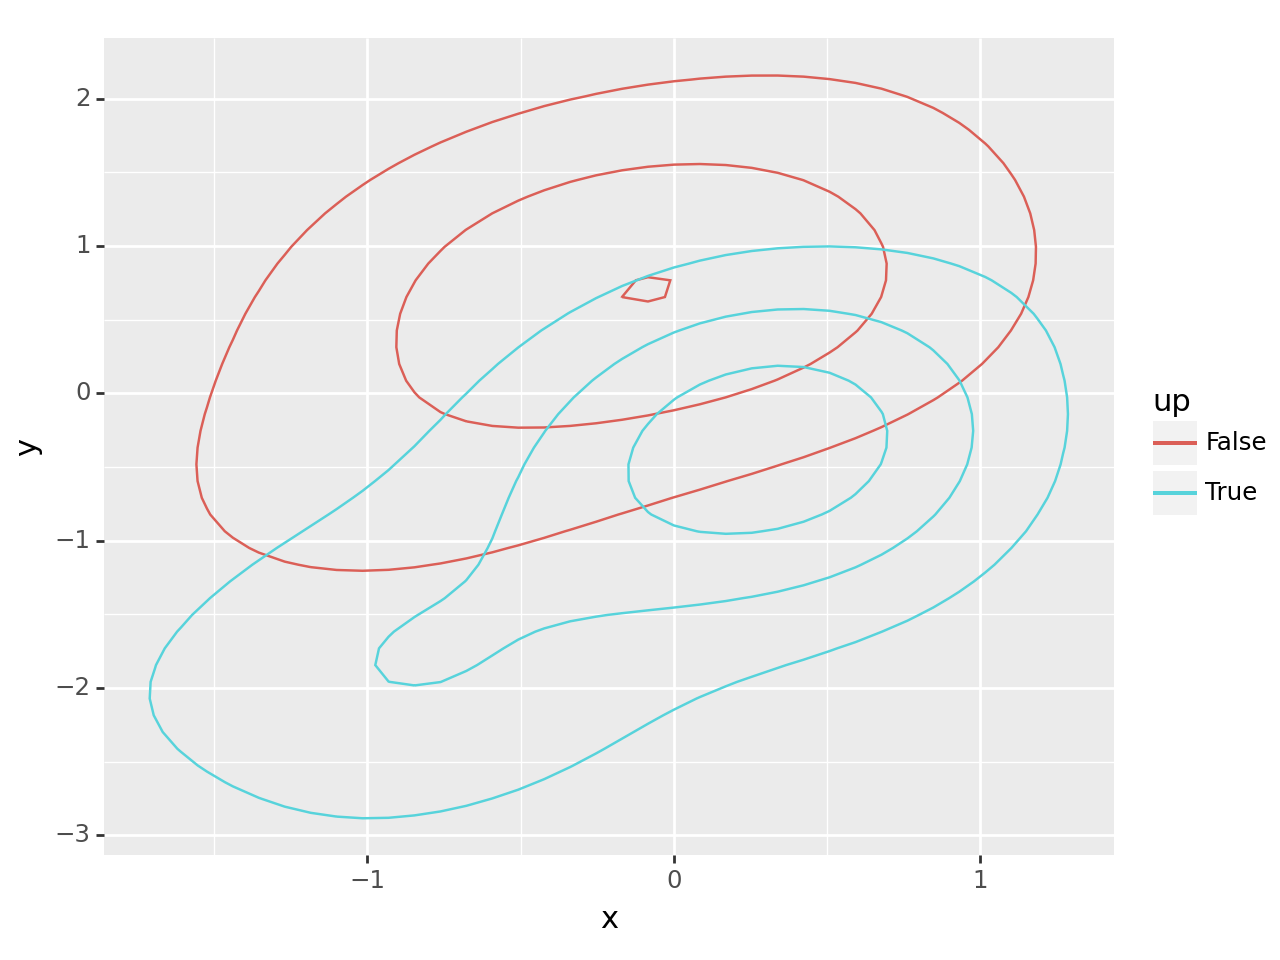

<Figure Size: (640 x 480)>

In [10]:
(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up'))+
    plotnine.geom_density_2d()
)

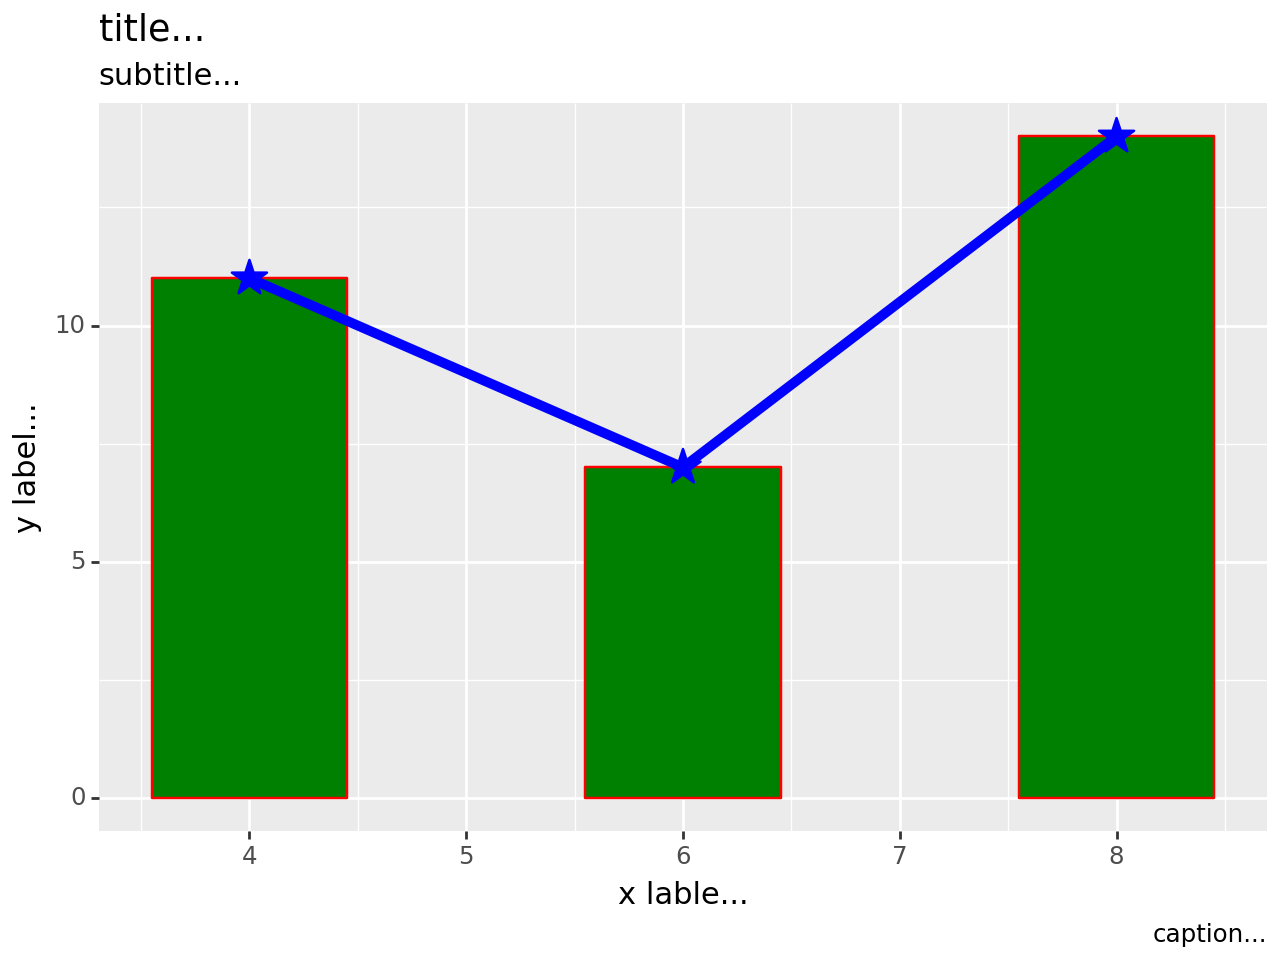

<Figure Size: (640 x 480)>

In [11]:
(
cars >>
    siuba.count('cyl') >>
    ggplot(aes(x='cyl', y='n'))+
    plotnine.geom_col(color='red', fill='green')+
    plotnine.geom_point(color='blue', size=7,shape='*')+
    plotnine.geom_line(color='blue', size=2)+
    plotnine.labs(title='title...',subtitle='subtitle...',caption='caption...', x='x lable...', y= 'y label...')
)

In [12]:
np.linspace(0,10,num=11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [13]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [14]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [15]:
np.array2string(np.ones(5))

'[1. 1. 1. 1. 1.]'

In [16]:
np.array_equal(np.ones(5),np.ones(4))

False

In [17]:
np.array_equiv(np.ones(5),np.ones(5))

True

In [18]:
cars.columns

Index(['cyl', 'mpg', 'hp'], dtype='object')

In [21]:
a=2;b=3
f'a={a}, b={b}'

'a=2, b=3'

In [22]:
'a={x}{y}'.format(x="{",y=a)

'a={2'

In [24]:
n = 50
rn_g = np.random.default_rng(seed)
x = rn_g.normal(loc=0.0, scale =1, size =n)

In [15]:
import itertools as itr

In [ ]:
list(itr.cycle([1,2,3]))

In [1]:
from itertools import cycle, repeat

In [3]:
list(zip([1,2,3,4,5,6,7], cycle([True,False])))

[(1, True),
 (2, False),
 (3, True),
 (4, False),
 (5, True),
 (6, False),
 (7, True)]

In [4]:
ls1 = list(zip([1,2,3,4,5,6,7], cycle([True,False])))

In [5]:
[x[0] for x in ls1 if x[1]]

[1, 3, 5, 7]

In [8]:
ls1 = list(zip([1,2,3,4,5,6,7], cycle([True,False, True])))

In [9]:
ls1

[(1, True), (2, False), (3, True), (4, True), (5, False), (6, True), (7, True)]

In [14]:
rp1 = repeat((1,2,3),3)
list(rp1)

[(1, 2, 3), (1, 2, 3), (1, 2, 3)]

In [21]:
rg1 = range(1,13)
['{0:02d}'.format(i) for i in rg1]

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [26]:
np.repeat([1,2,3],[1,2,3])

array([1, 2, 2, 3, 3, 3])

In [44]:
ls2 = zip(np.repeat([1,2,3],[1,2,3]),range(0,14))
list(ls2)

[(1, 0), (2, 1), (2, 2), (3, 3), (3, 4), (3, 5)]

In [30]:
np.repeat([1,2,3],[1,2,3])

array([2, 4, 4, 6, 6, 6])

In [53]:
print(np.repeat([1,2,3],[1,2,3]))
cyc1 = cycle(list(np.repeat([1,2,3],[1,2,3])))
list(zip(cyc1, np.array(range(0,3))))

[1 2 2 3 3 3]


[(1, 0), (2, 1), (2, 2)]

In [62]:
cyc1 = cycle(list(np.repeat([1,2,3],[1,2,3])))
ls3 = zip(cyc1, range(0,20))
ls3 = list(ls3)

In [73]:
cyc1 = cycle(list(np.repeat(['a','b','c'],[1,2,3])))
ls3 = zip(cyc1, range(0,15))
[item[0] for index , item in enumerate(ls3)]

['a', 'b', 'b', 'c', 'c', 'c', 'a', 'b', 'b', 'c', 'c', 'c', 'a', 'b', 'b']

In [61]:
list(enumerate(list(ls3)))

[]

In [76]:
cyc1 = cycle(list(np.repeat(['a','b','c'],[1,2,3])))
length_out = 16
[item[0] for item in zip(cyc1, range(0, length_out))]

['a',
 'b',
 'b',
 'c',
 'c',
 'c',
 'a',
 'b',
 'b',
 'c',
 'c',
 'c',
 'a',
 'b',
 'b',
 'c']

In [77]:
import string

In [80]:
letters = string.ascii_lowercase

In [85]:
ls4 = zip(cycle([True,False]), letters)
ls4 =  list(ls4)
ls4
[item[1] for item in ls4 if item[0]]

['a', 'c', 'e', 'g', 'i', 'k', 'm', 'o', 'q', 's', 'u', 'w', 'y']

In [94]:
list(itr.compress(['a','b','c'],[0,1,1]))

['b', 'c']

In [96]:
list(itr.compress(letters,cycle([1,0])))

['a', 'c', 'e', 'g', 'i', 'k', 'm', 'o', 'q', 's', 'u', 'w', 'y']

In [113]:
tmpl = string.Template('$name $family $NC')

In [114]:
tmpl.substitute(name='masoud',family='faridi', NC=4959903457)

'masoud faridi 4959903457'

In [1]:
from matplotlib.pyplot import subplots

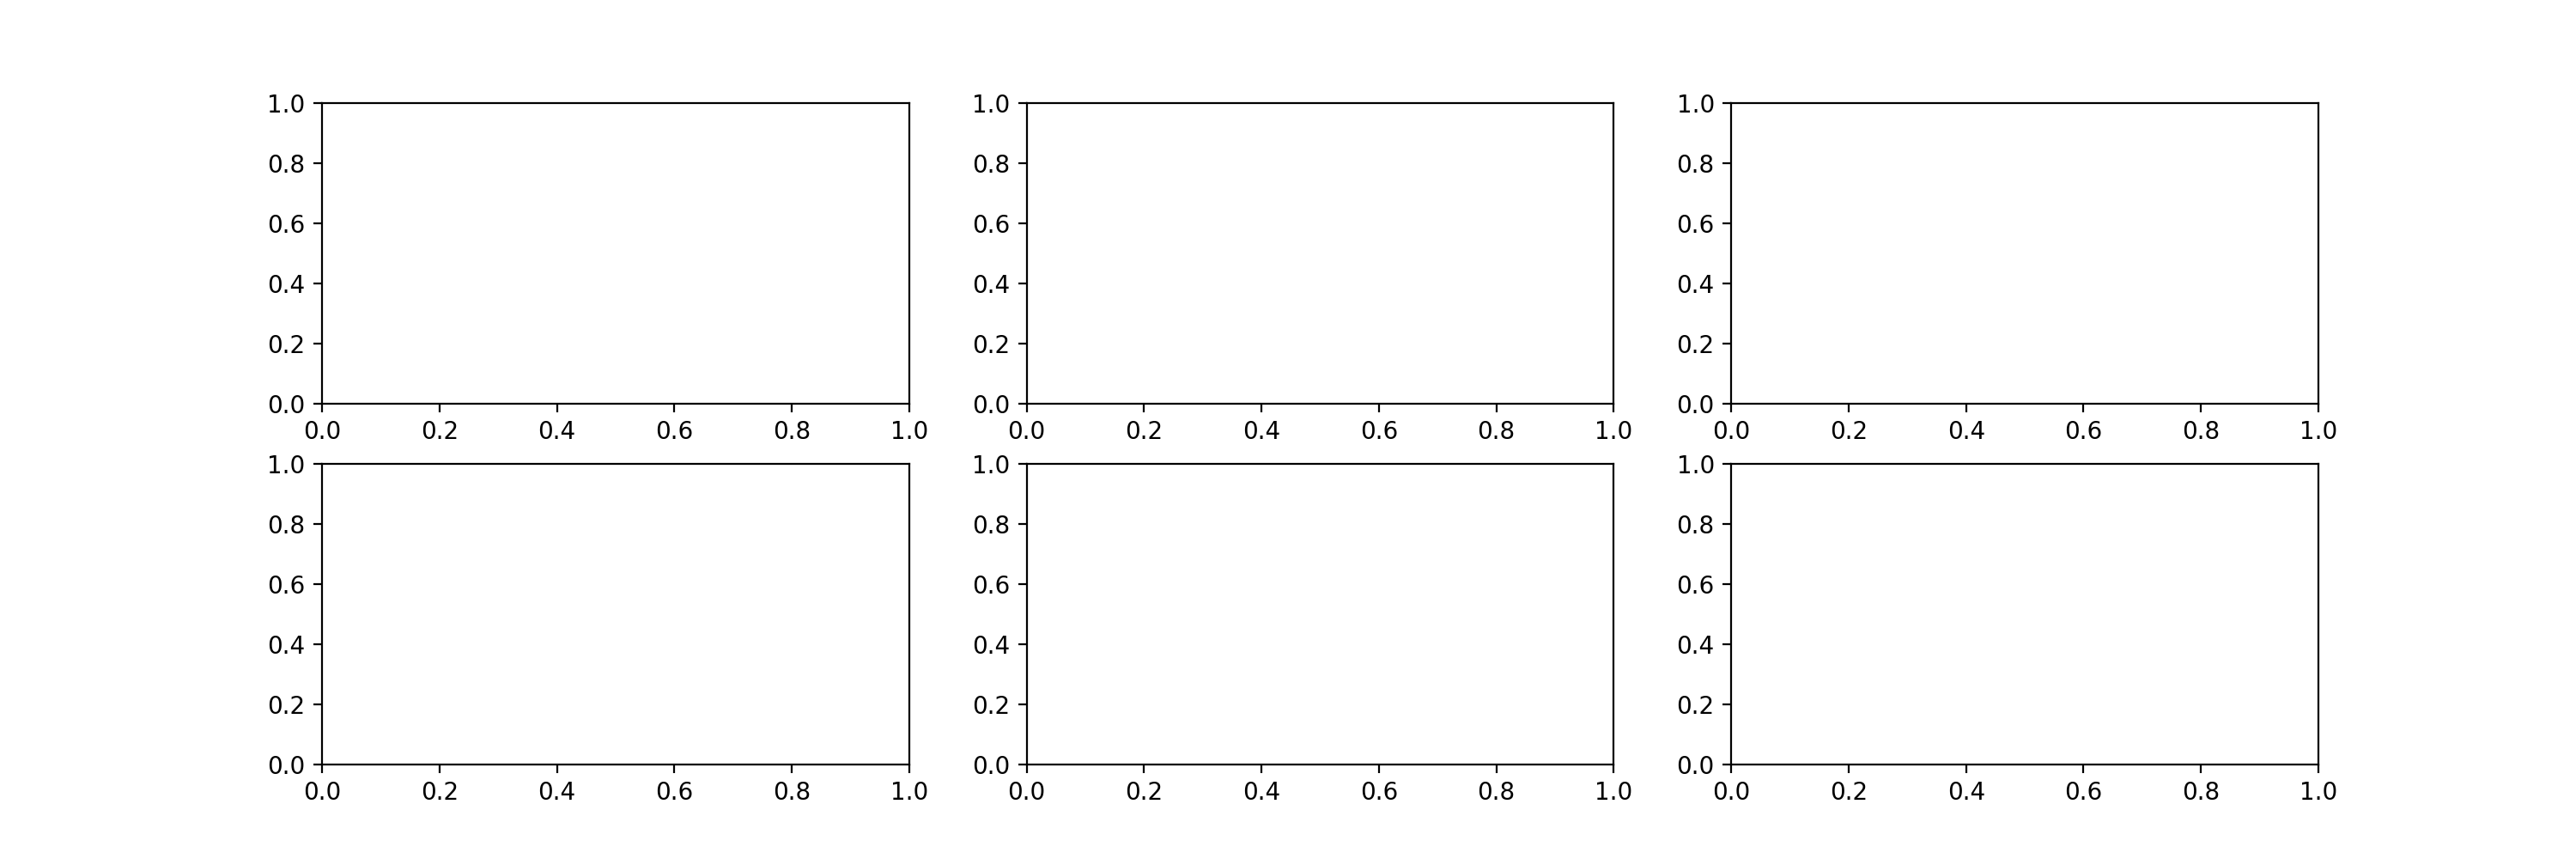

In [54]:
fig , axes = subplots(nrows=2,ncols=3,figsize=(15, 5))

In [55]:
axes[0,0].scatter(x,y,marker='o')

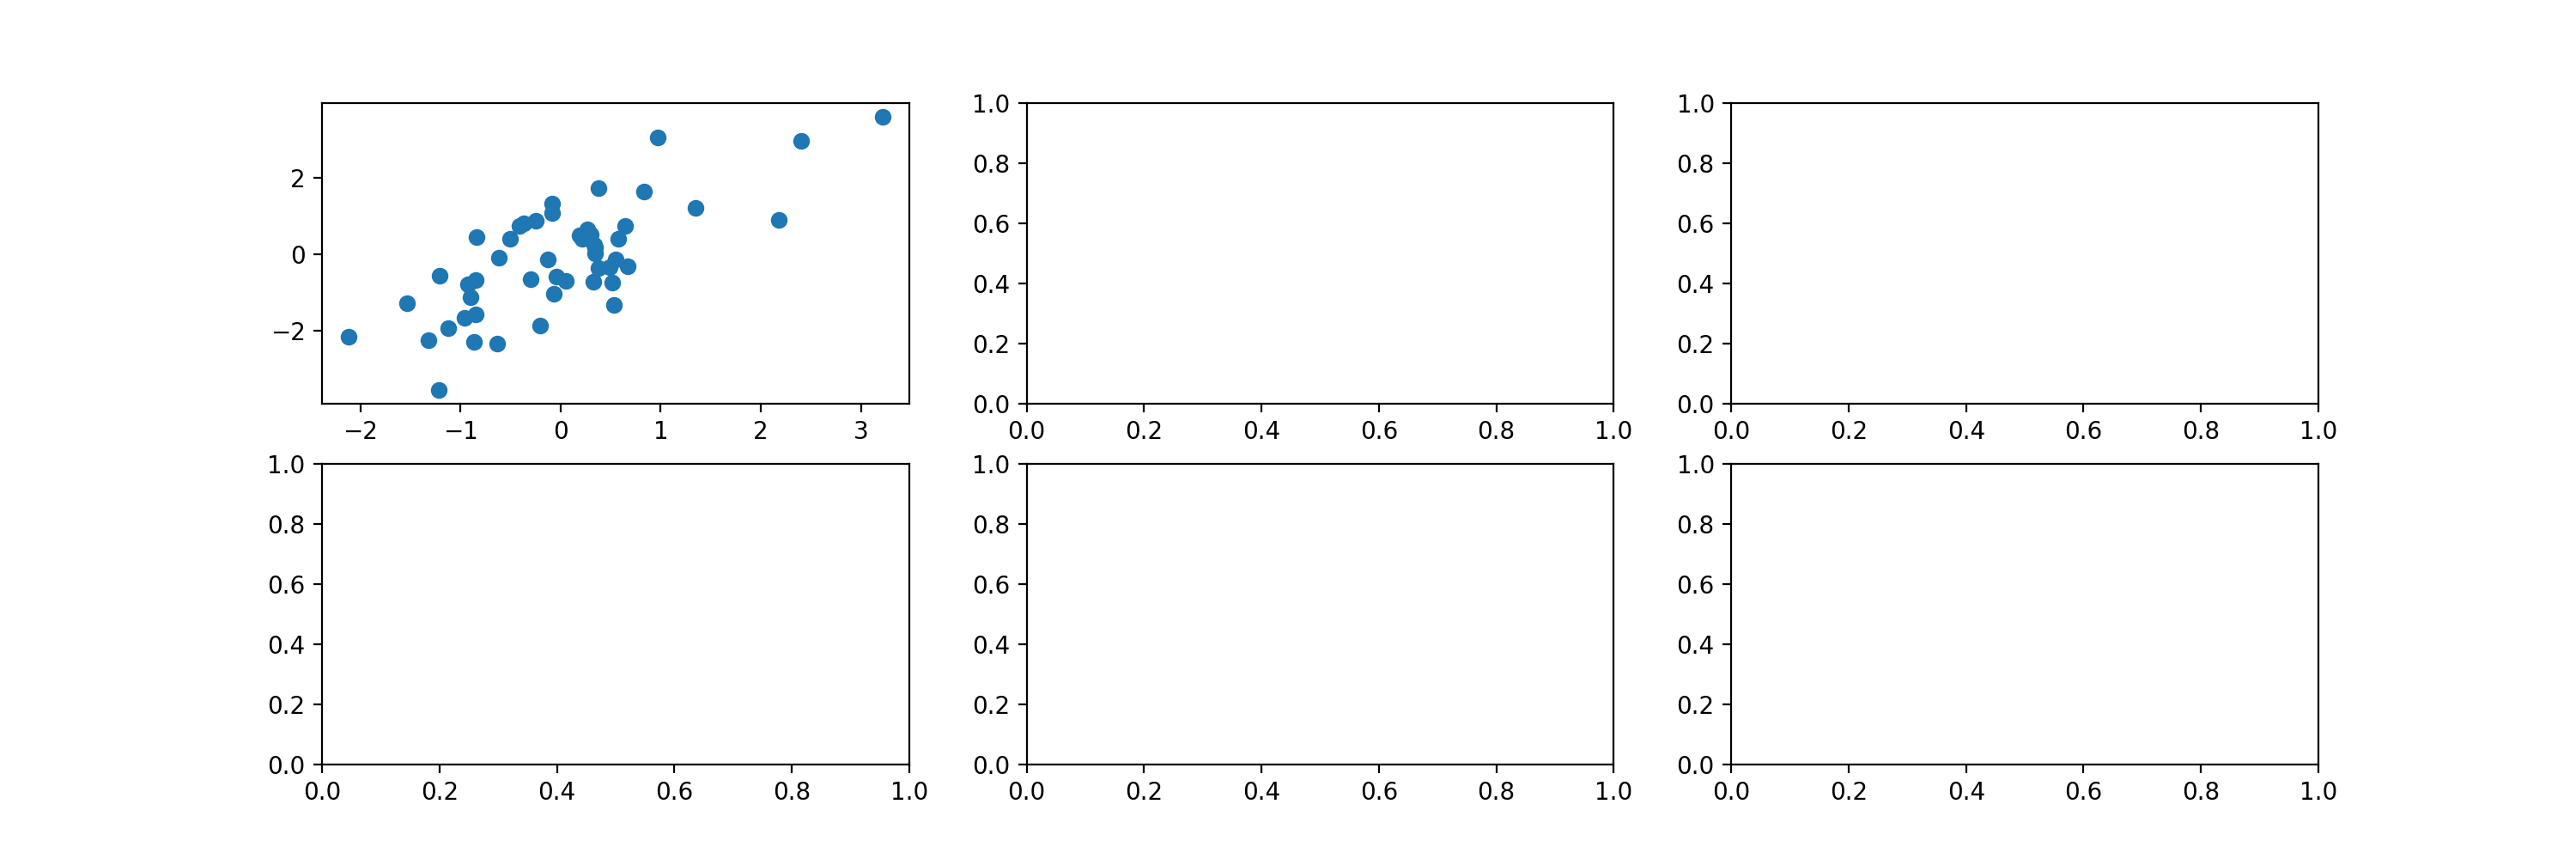

In [56]:
fig

In [57]:
plt3=(
df >>
    plotnine.ggplot(aes(x='x',y='y', color='up')) +
    geom_point() 
)
#plt3

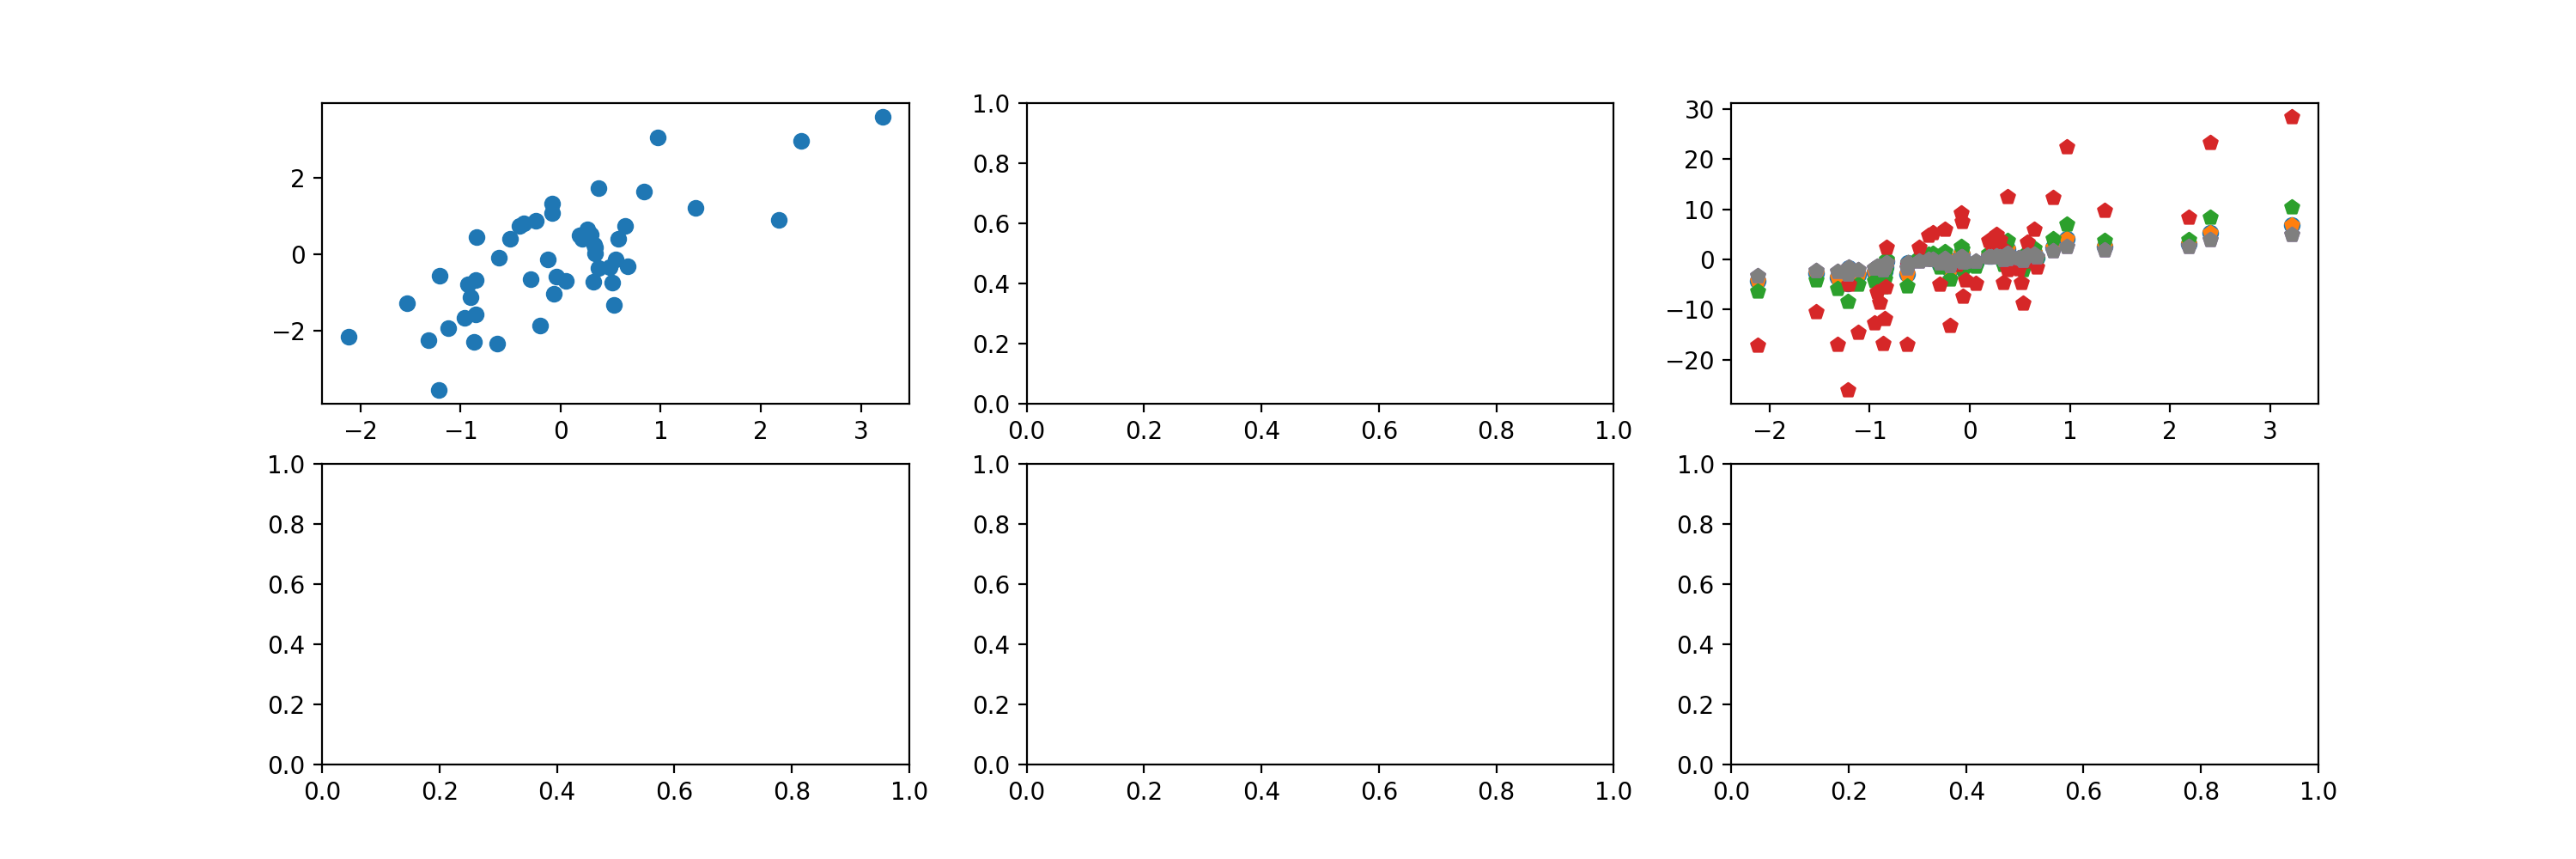

In [65]:
axes[0,2].scatter(x,x+0.5*y,marker='p')
fig

In [15]:
a=1
print(id(a))
print(hex(id(a)))

2435707502832
0x2371b7b00f0


In [16]:
a=a+1
print(id(a))
print(hex(id(a)))

2435707502864
0x2371b7b0110


In [19]:
l1 = [1,2,3]
print(id(l1))
print(hex(id(l1)))

2435895433728
0x23726ae9a00


In [20]:
l1[0]=20
print(l1)
print(id(l1))
print(hex(id(l1)))

[20, 2, 3]
2435895433728
0x23726ae9a00


In [22]:
l5 = list(range(0,20))
l5[0:19:3]

[0, 3, 6, 9, 12, 15, 18]

In [33]:
l7 = itr.compress(l5,itr.cycle([1,0,0]))

In [34]:
list(l7)

[0, 3, 6, 9, 12, 15, 18]

In [32]:
list(l7)

[]

In [1]:
import siuba.data as siuba_data

In [8]:
siuba_data.mtcars.to_excel('test.xlsx', sheet_name='sheet1', index=False)

In [10]:
import pandas as pd
df1 = pd.ExcelFile('test.xlsx')

In [12]:
df1.sheet_names

['sheet1']

In [19]:
df1.book['sheet1']

In [20]:
import pandas as pd
df1 = pd.read_excel("C:/Masoud/powerBI/mtcars.xlsx")

In [21]:
df1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
